# AML Exam

•

# 1. Importing Libraries

• Downloading external libraries

In [ ]:
!pip install opencv-python
!pip install tensorflow

• Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import shutil
from matplotlib import pyplot as plt

In [3]:
def remove_unwanted_folders(folder):
    if ".DS_Store" in folder:
        folder.remove(".DS_Store")
        print("Removed DS_Store")
    if ".ipynb_checkpoints" in folder:
        folder.remove(".ipynb_checkpoints")
        print("removed checkpoints")

# 2. Preparing and Augmenting Data

## 2.1 Augmenting Data to get more samples.
    • Flip Horizontal
    • Flip Vertical
    • Brightness
    • Contrast
    • Saturation

In [ ]:
# Get list of all disease folders in data
original_data_path = "./Data/original_data/"
original_data_folder = os.listdir(original_data_path)
remove_unwanted_folders(original_data_folder)


augmented_data_path = "./Data/aug_data/"
augmented_data_folder = os.listdir(augmented_data_path)

In [10]:
def save_Augmented_Image(save_path,img):
    cv2.imwrite(save_path,img)

for disease in original_data_folder: # Looping over all disease folders
    
    # Get all images inside of current disease folder
    images = os.listdir(os.path.join(original_data_path,disease))

    # Loading each image in folder
    for current_image in images:
        # Get full path of current image
        current_image_full_path = os.path.join(original_data_path, disease, current_image)
        
        #Save Original Image
        current_image_cv2 = cv2.imread(current_image_full_path)                                
        save_Augmented_Image(os.path.join(augmented_data_path, disease, "o_"+current_image),current_image_cv2)
        
        # Flip Horizontal
        horizontal_flip_image = cv2.flip(current_image_cv2,1)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"fH_"+current_image),horizontal_flip_image)

        # Flip Vertical
        vertical_flip_image = cv2.flip(current_image_cv2,0)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"fV_"+current_image),vertical_flip_image)

        # Adjust Brightness
        brightness_higher = cv2.convertScaleAbs(current_image_cv2, alpha=1, beta=70)
        brightness_lower = cv2.convertScaleAbs(current_image_cv2, alpha=1, beta=-40)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"bH_"+current_image),brightness_higher)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"bL_"+current_image),brightness_lower)

        # Adjust Contrast
        contrast_higher = cv2.convertScaleAbs(current_image_cv2, alpha=1.6, beta=0)
        contrast_lower = cv2.convertScaleAbs(current_image_cv2, alpha=0.7, beta=0)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"cH_"+current_image),contrast_higher)
        save_Augmented_Image(os.path.join(augmented_data_path,disease,"cL_"+current_image),contrast_lower)
        

## 2.2 Saving augmented data into train, validation and test

In [ ]:
# Get list of all disease folders in data
original_data_path = "./Data/aug_data/"
original_data_folder = os.listdir(original_data_path)

remove_unwanted_folders(original_data_folder)
print(original_data_folder)

In [24]:
for disease in original_data_folder:
    # Get all images inside each corresponding disease folder
    images = np.array(os.listdir(os.path.join(original_data_path,disease)))
    
    # Specify train, test and validation sizes
    train_partition = int(len(images)*.7)
    validation_partition = int(len(images)*.2)
    test_partition = int(len(images)*.1)
    
    # Empty lists to store all numbers in range into a list.
    train_partition_indexes = []
    validation_partition_indexes = []
    test_partition_indexes = []
    
    # Array of Train images from partition.
    for x in range(0,train_partition):
        train_partition_indexes.append(x)
    train_image_array = np.take(images,train_partition_indexes)
    
    # Array of Validation images from partition.
    for x in range(train_partition, train_partition + validation_partition):
        validation_partition_indexes.append(x)
    validation_image_array = np.take(images, validation_partition_indexes)
    
    # Array of Test images from partition.
    for x in range(train_partition + validation_partition , train_partition + validation_partition + test_partition):
        test_partition_indexes.append(x)
    test_image_array = np.take(images, test_partition_indexes)
        
    
    # Used for Generating disease folders in train, validation and test directories.
    #os.mkdir(f"./Data/data/train/{disease}")
    #os.mkdir(f"./Data/data/test/{disease}")
    #os.mkdir(f"./Data/data/val/{disease}")
    
    # Defining path to new folders
    train_folder_path = "./Data/data/train/"
    validation_folder_path = "./Data/data/val/"
    test_folder_path = "./Data/data/test/"
    
    # Moving images to their respective train, validation and test folders
    # • Train Images
    for current_image in train_image_array:
        current_image_full_path = os.path.join(original_data_path, disease, current_image)
        shutil.copyfile(current_image_full_path, os.path.join(train_folder_path, disease, current_image))

    # • Validation Images
    for current_image in validation_image_array:
        current_image_full_path = os.path.join(original_data_path, disease, current_image)
        shutil.copyfile(current_image_full_path, os.path.join(validation_folder_path, disease, current_image))
    
    # • Test Images
    for current_image in test_image_array:
        current_image_full_path = os.path.join(original_data_path, disease, current_image)
        shutil.copyfile(current_image_full_path, os.path.join(test_folder_path, disease, current_image)) 
    


# 3. Model Architectures

## 3.1 ???

### • Importing Libraries

### • Load processed data

### • Define Model

### • Train Model

### • Export model as pickle

## 3.2 Convolutional Neural Network (CNN)

### • Defining Image Paths

In [ ]:
train_path = "./Data/data/train/" # Augmented Data
train_path = "./Data/original_data/" # Original Data
train_folder = os.listdir(train_path)
remove_unwanted_folders(train_folder)

val_path = "./Data/data/val/" # Augmented Data
val_path = "./Data/original_data/" # Original Data
val_folder = os.listdir(val_path)
remove_unwanted_folders(val_folder)

test_path = "./Data/data/test/" # Augmented Data
test_path = "./Data/original_data/" # Original Data
test_folder = os.listdir(test_path)
remove_unwanted_folders(test_folder)

### • Loading data with tensorflow

In [5]:
train = tf.keras.utils.image_dataset_from_directory("./Data/data/train",image_size=(224,224))
val = tf.keras.utils.image_dataset_from_directory("./Data/data/val", image_size=(224,224))
#test = tf.keras.utils.image_dataset_from_directory("./Data/data/test")

Found 5670 files belonging to 8 classes.
Found 1614 files belonging to 8 classes.


### • Transforming from regular 0-255 values to 0-1 values

In [735]:
#train = train.map(lambda x,y: (x/255, y))
#val = val.map(lambda x,y: (x/255, y))
#test = test.map(lambda x,y: (x/255, y))

In [736]:
#train_size = int(len(data)*.7)
#val_size = int(len(data)*.2)
#test_size = int(len(data)*.1)

In [737]:
#train = data.take(train_size)
#val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

### • Importing Tensorflow libraries for CNN model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model = Sequential()

### • Defining Model Structure

In [751]:
# Github
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.25))


In [713]:
# Tensorflow
model.add(Conv2D(16, 3, 1,activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, 1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, 1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.25))

In [8]:
#test
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

### • Compiling and training model

In [10]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
logdir='logs'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

### • Plotting Results

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### • Mapping Classes to indexes

In [32]:
class_map = {
    0: 'BA- cellulitis',
    1: 'BA-impetigo',
    2: 'FU-athlete-foot',
    3: 'FU-nail-fungus',
    4: 'FU-ringworm',
    5: 'PA-cutaneous-larva-migrans',
    6: 'VI-chickenpox',
    7: 'VI-shingles'}

### • Loading and resizing image for test prediction

In [ ]:
img = cv2.imread('./Data/data/test/BA- cellulitis/bH_BA- cellulitis (66).jpg')
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
pred_image = resize/255

yhat = model.predict(np.expand_dims(pred_image, 0))

print(yhat)
class_label = np.argmax(yhat)
predicted_class = f"{class_map[class_label]}"
predicted_class

### • Export model as pickle

In [31]:
model.save(os.path.join("./Saved_Models","CNN_V1.h5"))

## 3.3 Support Vector Machine (SVM)

### • Importing Libraries

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings("ignore")

### • Class for Loading Dataset

In [161]:
class Data_Loader:
    __doc__ = "Class used to convert directory of disease folders with images into practical numpy arrays for ML!"
    
    def unison_shuffle(self, X_array, Y_array):
        assert len(X_array) == len(Y_array)
        shuffle = np.random.permutation(len(X_array))
        return X_array[shuffle], Y_array[shuffle]
    
    def generate_image_array(self, folder_path):
        
        self.folder_path = folder_path
        self.folder = os.listdir(self.folder_path)
        remove_unwanted_folders(self.folder)
    
        # Creates temporary lists to store images
        temp_x = []
        temp_y = []

        # Gathering Training Data
        for disease in self.folder:
            images = os.listdir(os.path.join(self.folder_path,disease))
            for current_image in images:
                # Load every image in current disease folder as cv2 image
                current_image_full_path = os.path.join(self.folder_path, disease, current_image)
                current_image = cv2.imread(current_image_full_path)
                current_image = cv2.resize(current_image,(224,224))

                # Adds current image to list, flattened.
                temp_x.append(current_image.flatten())
                temp_y.append(disease)
                
        # Convert from list to array, len(temp_x) is the amount of images (array rows) and -1 is the total lenght of values (coloumns)
        # Theese values are divided by 255 to convert from standard RGB 0-255 into a more machine learning friendly 0-1 values.
        temp_x = np.array(temp_x).reshape(len(temp_x), -1)/255
        temp_y = np.array(temp_y)
        
        temp_x , temp_y = self.unison_shuffle(temp_x, temp_y)
        return temp_x, temp_y
    
    # Defind Documentation for 
    generate_image_array.__doc__ = '''This function converts all images located in disease folders into X and Y numpy arrays.
                                      Example:
                                      data.generate_image_array(path to training data folder as string)
                                      Returns -> X, Y'''

In [162]:
train_path = "./Data/data/train/" # Augmented Data
val_path = "./Data/data/val/" # Augmented Data
test_path = "./Data/data/test/" # Augmented Data

# Create Data_Loader object
data = Data_Loader()

In [176]:
# Generate data split from data class object.
train_x ,train_y = data.generate_image_array(train_path)
test_x ,test_y = data.generate_image_array(test_path)

### • Visualizing Loaded Data

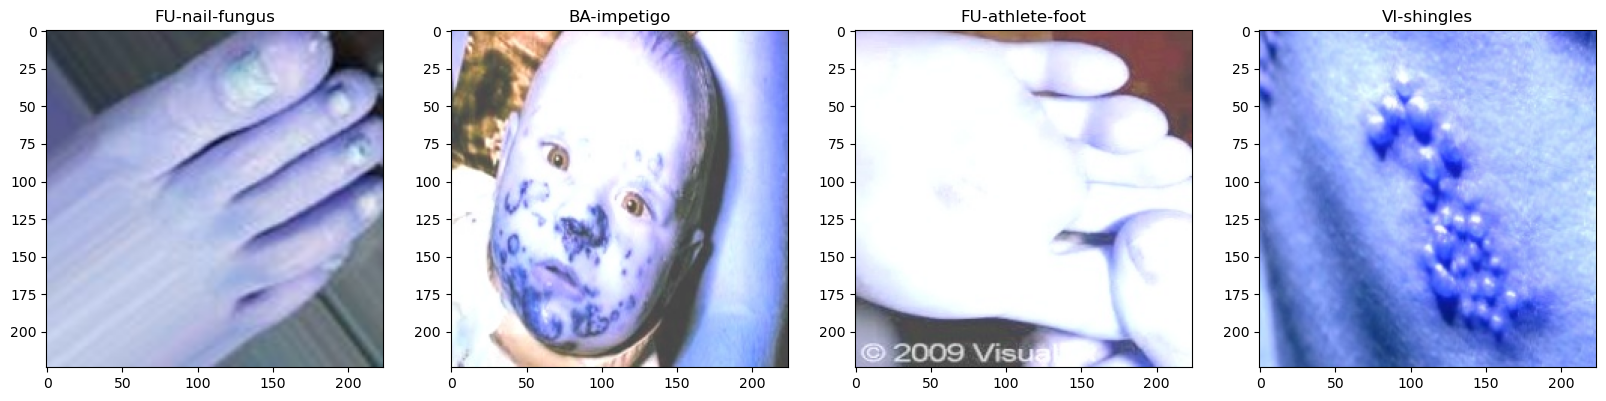

In [183]:
# Plotting Sample of the dataset
plot_images = train_x.reshape((len(train_x),224,224,3))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Looping over 4 images and plotting them
for index, image in enumerate(train_x[:4]):
    ax[index].imshow(plot_images[index])
    ax[index].title.set_text(train_y[index])
    
# Open-CV used BGR as standard, which is the reason colors are off

### • Training Support Vector Classifier (SVC)

In [ ]:
# This takes approximately XXXXXX minutes on Macbook Air m2

svc = SVC(kernel="rbf")
svc.fit(train_x,train_y)

### • Gathering Model Results

In [192]:
# This takes approximately XX minutes on Macbook Air m2
result_image_count = 1

y_pred_train = svc.predict(train_x[:result_image_count])
y_pred_test = svc.predict(test_x[:result_image_count])

#### • Accuracy Score

In [193]:
print(f"Training accuracy:  {accuracy_score(train_y[:result_image_count], y_pred_train)}")
print(f"Test accuracy:  {accuracy_score(test_y[:result_image_count], y_pred_test)}")

Training accuracy:  0.0
Test accuracy:  1.0


#### • Classification Report

In [195]:
c_report = classification_report(test_y[:result_image_count],y_pred_test)
print(c_report)

              precision    recall  f1-score   support

 FU-ringworm       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



### • Load model

In [50]:
model_path = "../../Saved_Models/svc.h5"
svc = pickle.load(open(model_path, 'rb'))

### • Export model as pickle

In [16]:
save_model ="./Saved_Models/svc_rbf.h5"
pickle.dump(svc, open(save_model, 'wb'))

### • Predict with model

Actual Class: PA-cutaneous-larva-migrans
Predicted Class: PA-cutaneous-larva-migrans
   --- Correctly Classified ---   


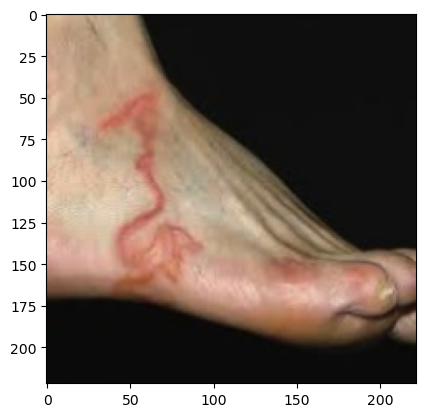

In [191]:
# Load new image to predict
image_path = './Data/original_data/PA-cutaneous-larva-migrans/68_PA-cutaneous-larva-migrans (33).jpg'
actual_class = image_path.split("/")[-2]
predict_image = cv2.imread(image_path)
predict_image = cv2.resize(predict_image, (224,224))
predict_image = np.array(predict_image.flatten()).reshape(1,-1)/255

RGB_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

# Get prediction
prediction = svc.predict(predict_image)[0]
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {prediction}")

if prediction == actual_class:
    print("   --- Correctly Classified ---   ")
else:
    print("   --- Incorrectly Classified ---   ")

# 4. Model Evaluation

## 4.1 Testing Models

### • Test functionality

### • Gather datapoints for visualization

## 4.2 Visualisations

### Visualizing with matplotlib:
    • Test Loss
    • Test Accuracy
    • Visualise all model performances
    • Visualise images with predicted area of infection

## 4.3 Saving Predictions

### Save predictions to "predicted_data" folder